In [3]:
from dataval.dataset import WeatherDataset
from dataval.plot import violinplot
import matplotlib
import os
import pandas as pd
import seaborn as sns

import wandb

os.environ["WANDB_QUIET"] = "true"

run = wandb.init(project="ml-dataval-tutorial")

In [4]:
ds = WeatherDataset(os.path.join(os.getcwd(), "canonical-paritioned-dataset")) # Time based partitioned wrapper

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

# Explore Data

[Dataset paper](https://arxiv.org/pdf/2107.07455.pdf): Appendix C.2 has the description of features.

In [8]:
print(ds.get_partition_keys())

['2018_35', '2018_36', '2018_37', '2018_38', '2018_39', '2018_40', '2018_41', '2018_42', '2018_43', '2018_44', '2018_45', '2018_46', '2018_47', '2018_48', '2018_49', '2018_50', '2018_51', '2018_52', '2019_01', '2019_02', '2019_03', '2019_04', '2019_05', '2019_06', '2019_07', '2019_08', '2019_09', '2019_10', '2019_11', '2019_12', '2019_13', '2019_14']


In [6]:
len(ds.get_partition_keys())

32

In [15]:
df = ds.load(ds.get_partition_keys()[0])
df.sample(5)

,fact_time,fact_latitude,fact_longitude,fact_temperature,fact_cwsm_class,climate,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,...,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,gfs_total_clouds_cover_low_next,year_week
379,2018-09-01 06:00:00,26.760599,80.889297,26.0,11.0,mild temperate,125.0,68.275283,30.675714,742.911798,...,0.0,0.0,0.0,0.0,0.0,0.200012,25.550012,0.0,0.0,2018_35
494,2018-09-01 08:20:00,38.175999,13.091000,25.0,0.0,mild temperate,18.0,37.359772,23.397143,747.568063,...,0.0,0.0,0.0,0.0,0.0,-5.079102,11.550012,0.0,0.0,2018_35
2151,2018-09-02 12:00:00,37.493000,57.308201,27.0,0.0,dry,1064.0,29.623965,26.935714,650.662129,...,0.0,0.0,0.0,0.0,0.0,1.200012,-0.049994,0.0,0.0,2018_35
633,2018-09-01 10:41:00,26.197300,-80.170700,24.0,10.0,mild temperate,6.0,-14.751699,27.250000,762.007601,...,0.0,0.0,0.0,0.0,0.0,-0.800018,22.249994,-1.0,0.0,2018_35
1999,2018-09-02 09:00:00,39.616667,27.916667,31.0,0.0,mild temperate,111.0,53.456580,20.337857,738.328833,...,0.0,0.0,0.0,0.0,0.0,-1.399994,13.350000,0.0,0.0,2018_35


In [16]:
wandb.log({"sample": wandb.Table(dataframe=df.head())})

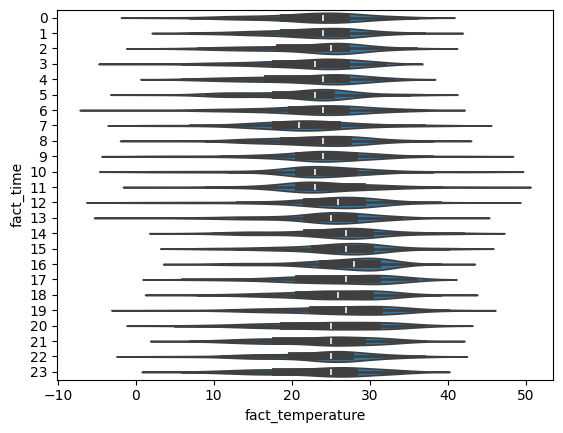

In [17]:
plot = violinplot(df, "fact_temperature", "hour")
wandb.log({"fact_temperature": wandb.Image(plot.figure)})

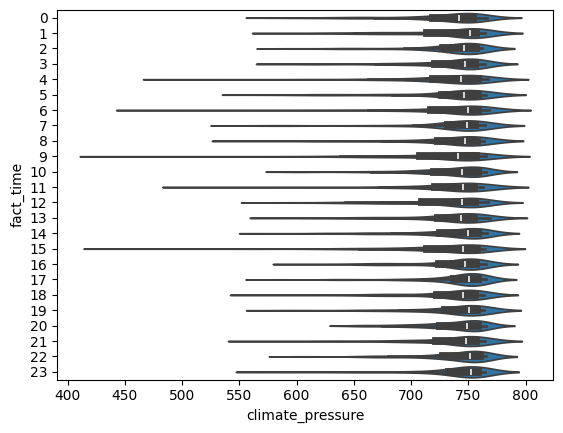

In [18]:
plot = violinplot(df, "climate_pressure", "hour")
wandb.log({"climate_pressure": wandb.Image(plot.figure)})

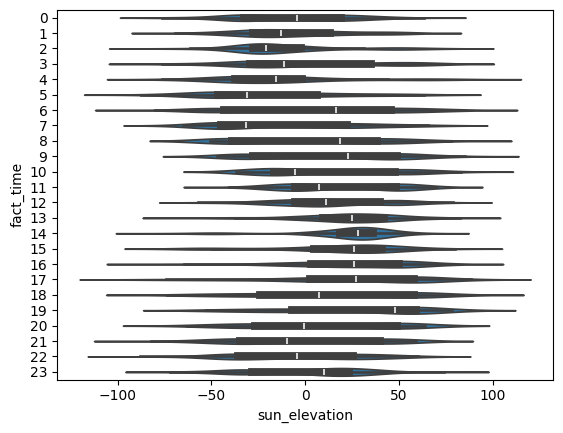

In [20]:
plot = violinplot(df, "sun_elevation", "hour")
wandb.log({"sun_elevation": wandb.Image(plot.figure)})

In [21]:
run.finish()